In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [270]:
data = pd.read_csv("test.csv")

In [271]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.0525
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.3940
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.6836
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.4775
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.0800
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,177150.9892
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,172070.6592
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,175110.9565
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,162011.6

In [272]:
data.shape

(1459, 81)

In [273]:
dataset = data.copy()

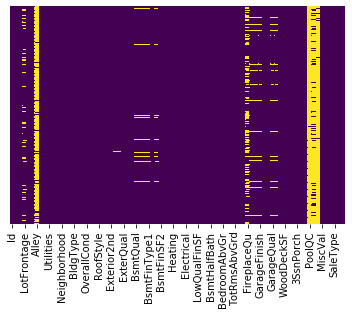

In [59]:
import seaborn as sns
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [274]:
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [275]:
#Less Than 10% Null
b=[]
for column in dataset.columns:
    a = dataset[column].isnull().sum()
    if(a/len(dataset) <= 0.10):
        b.append(column)
print(len(b))

75


In [276]:
# More than 10% Null
c=[]
for column in dataset.columns:
    a = dataset[column].isnull().sum()
    if(a/len(dataset) >= 0.10):
        c.append(column)
print(c)

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [277]:
dataset = dataset.drop(columns=['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1)

In [278]:
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,169277.0525
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,187758.3940
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,183583.6836
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,179317.4775
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,150730.0800


In [4]:
# Retriving Categorical columns
cate_col = [column for column in dataset.columns if dataset[column].dtype == 'O']
print(cate_col)
print(len(cate_col))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
38


In [5]:
num_col = [column for column in dataset.columns if dataset[column].dtype != 'O']
print(num_col)
print(len(num_col))

['Unnamed: 0', 'Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
38


In [281]:
dataset.shape

(1459, 75)

In [282]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:  
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [283]:
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,169277.0525
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,187758.3940
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,183583.6836
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,179317.4775
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,150730.0800


In [284]:
dataset.isnull().sum()

Id                0
MSSubClass        0
MSZoning          4
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [285]:
num_col_na = [column for column in dataset.columns if (dataset[column].isnull().sum()>0) and (dataset[column].dtype != 'O')]
print(num_col_na)
print(len(num_col_na))

['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
10


In [286]:
cate_col_na = [column for column in dataset.columns if (dataset[column].isnull().sum()>0) and (dataset[column].dtype == 'O')]
print(cate_col_na)
print(len(cate_col_na))

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']
17


In [287]:
import statistics as stats
for column in cate_col_na:
    dataset[column] = dataset[column].fillna('Missing')

In [288]:
for column in num_col_na:
    dataset[column] = dataset[column].fillna(dataset[column].mean())

In [289]:
dataset.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [816]:
dataset.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# Train Dataset

In [534]:
#dataset.to_csv('Cleaned-Test(new).csv')
#dataset.to_csv('Cleaned-Train(new).csv')
dataset = pd.read_csv('Cleaned-Train(new).csv')
dataset.shape

(1460, 76)

In [535]:
import numpy as np
num_features=['LotArea', '1stFlrSF', 'GrLivArea','SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])
    


In [536]:
for feature in cate_col:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [537]:
dataset.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,9.041922,1,0,1,1,0,0,15,3,4,3,6,7,5,5,5,1,2,12,13,2,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,5,5.0,2,2,548,3,5,2,0,61,0,0,0,0,0,2,2008,4,4,12.247694
1,1,2,20,3,9.169518,1,0,1,1,2,0,20,1,4,3,4,6,8,31,31,1,2,6,6,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,6,1,5,31.0,2,2,460,3,5,2,298,0,0,0,0,0,0,5,2007,4,4,12.109011
2,2,3,60,3,9.328123,1,1,1,1,0,0,15,3,4,3,6,7,5,7,6,1,2,12,13,2,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,5,7.0,2,2,608,3,5,2,0,42,0,0,0,0,0,9,2008,4,4,12.317167
3,3,4,70,3,9.164296,1,1,1,1,1,0,17,3,4,3,6,7,5,91,36,1,2,4,7,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,5,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,2,8.0,1,3,642,3,5,2,0,35,272,0,0,0,0,2,2006,4,1,11.849398
4,4,5,60,3,9.565214,1,1,1,1,2,0,24,3,4,3,6,8,5,8,8,1,2,12,13,2,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,5,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,5,8.0,2,3,836,3,5,2,192,84,0,0,0,0,0,12,2008,4,4,12.429216


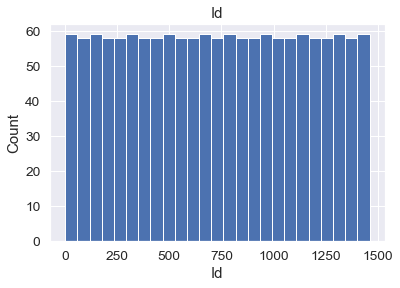

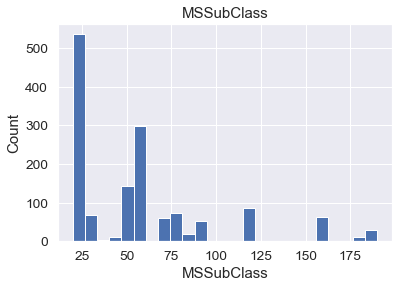

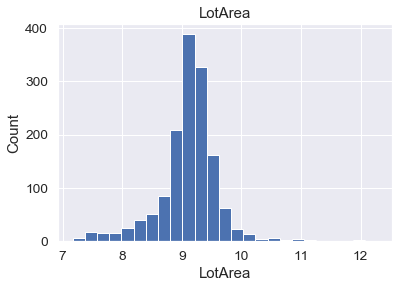

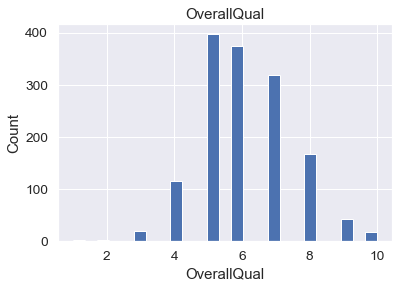

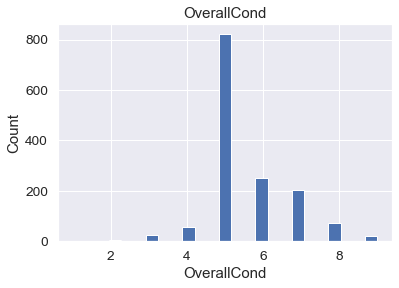

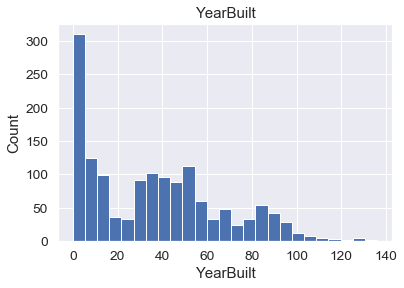

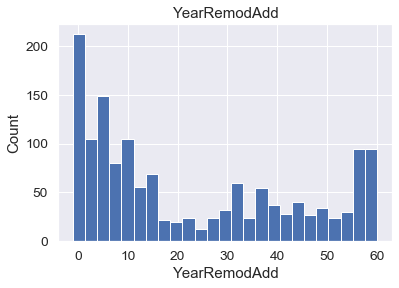

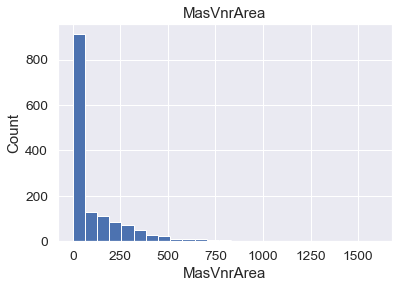

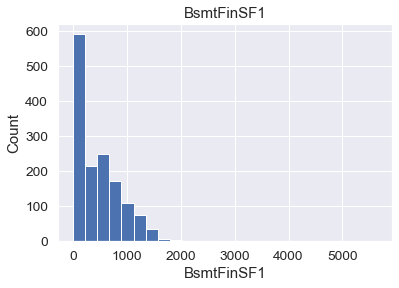

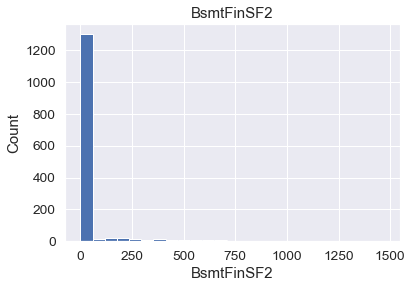

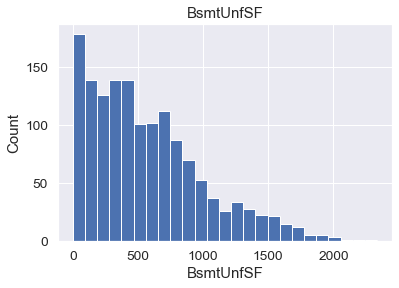

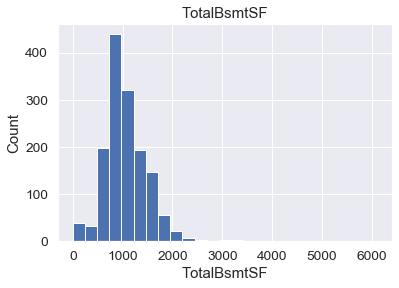

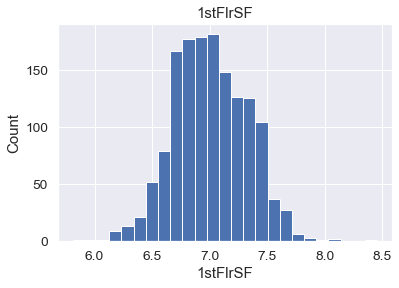

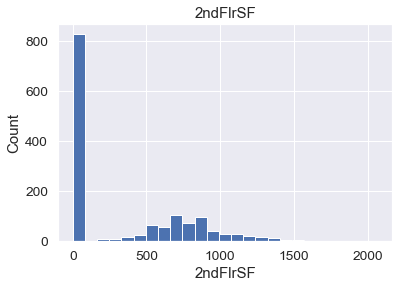

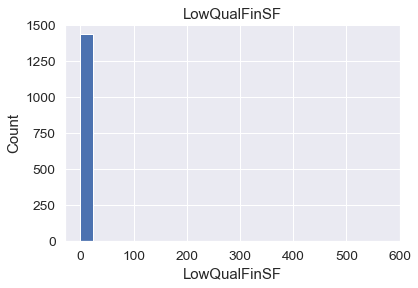

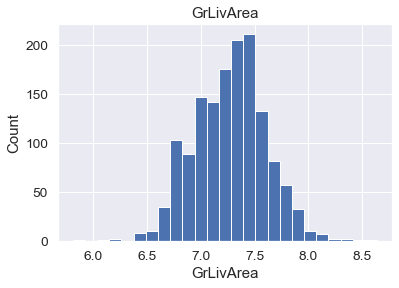

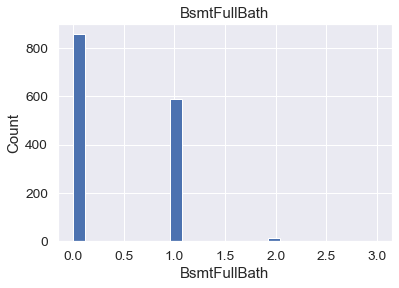

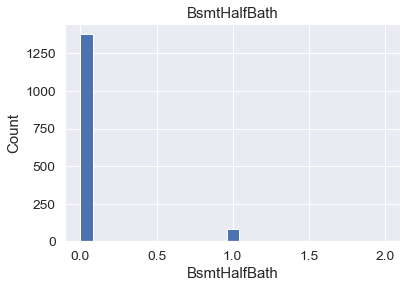

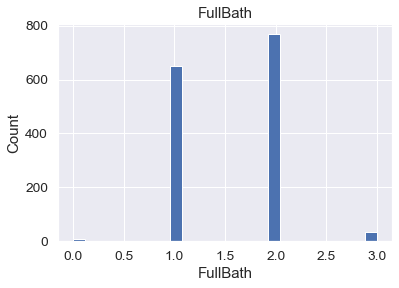

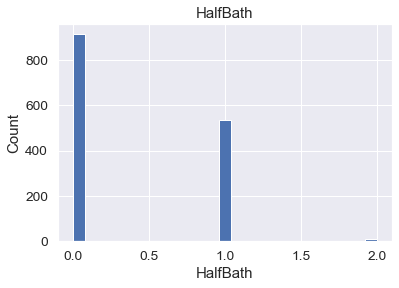

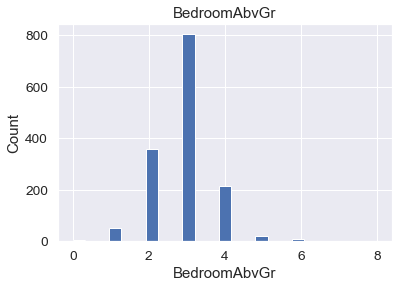

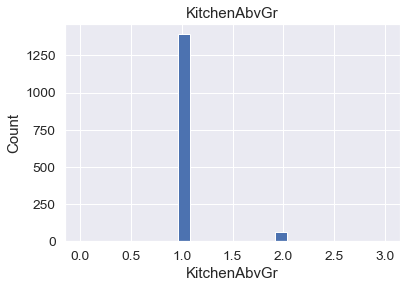

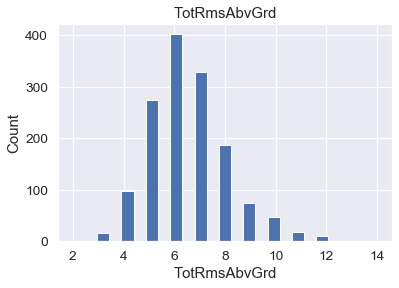

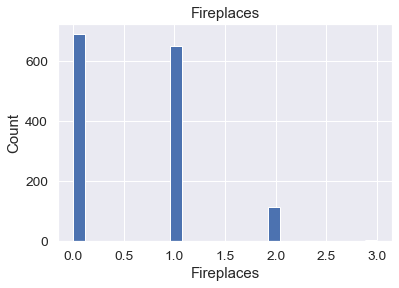

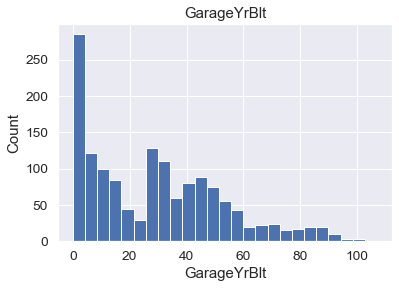

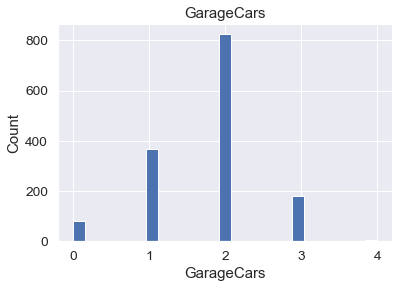

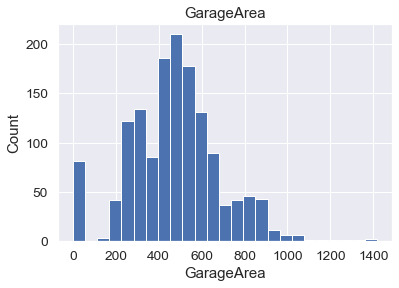

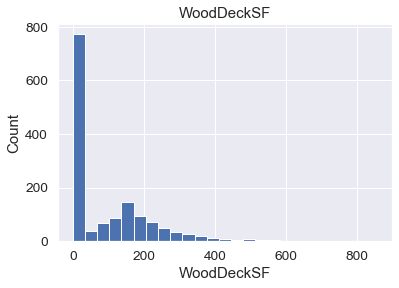

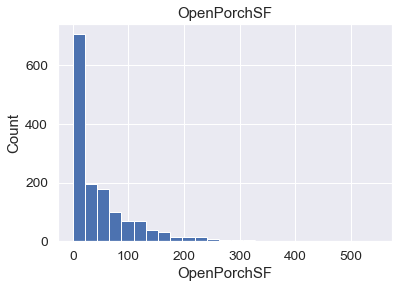

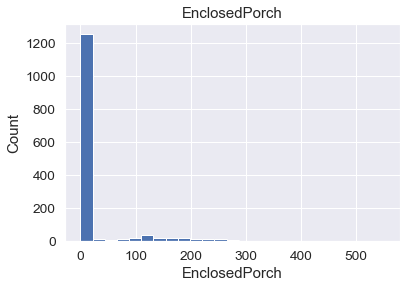

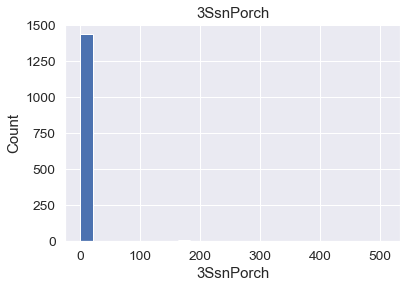

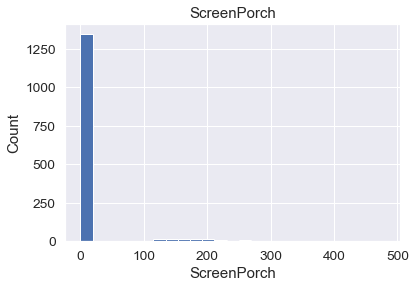

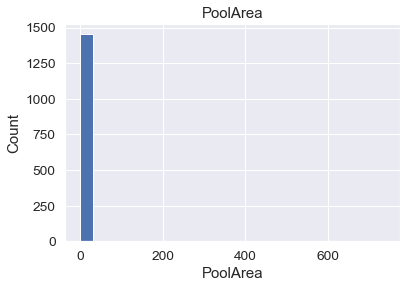

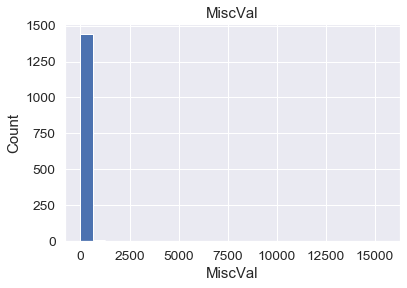

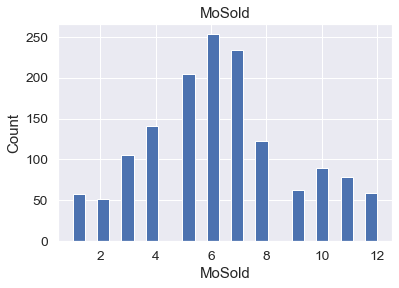

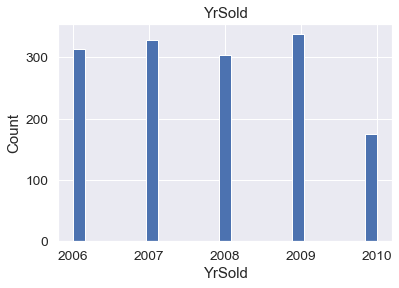

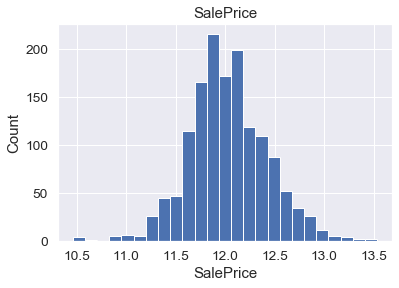

In [1058]:
for feature in num_col:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

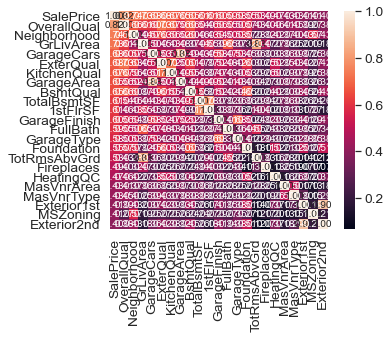

In [538]:
import seaborn as sns
corrmat = dataset.corr()
k = 23
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [539]:
corrmat.nlargest(k, 'SalePrice')['SalePrice'].sort_values()

Exterior2nd     0.402828
MSZoning        0.410575
Exterior1st     0.413927
MasVnrType      0.427868
MasVnrArea      0.429531
HeatingQC       0.473762
Fireplaces      0.489449
TotRmsAbvGrd    0.534422
Foundation      0.550411
GarageType      0.575628
FullBath        0.594771
GarageFinish    0.604878
1stFlrSF        0.608947
TotalBsmtSF     0.612134
BsmtQual        0.647718
GarageArea      0.650888
KitchenQual     0.667893
ExterQual       0.678840
GarageCars      0.680625
GrLivArea       0.730255
Neighborhood    0.742641
OverallQual     0.817184
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [540]:
dataset = dataset[cols]

In [541]:
dataset.head()

,SalePrice,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,KitchenQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,GarageFinish,FullBath,GarageType,Foundation,TotRmsAbvGrd,Fireplaces,HeatingQC,MasVnrArea,MasVnrType,Exterior1st,MSZoning,Exterior2nd
0,12.247694,7,15,7.444249,2,2,2,548,3,856,6.752270,2,2,5,5,8,0,4,196.0,2,12,3,13
1,12.109011,6,20,7.140453,2,1,1,460,3,1262,7.140453,2,2,5,2,6,1,4,0.0,1,6,3,6
2,12.317167,7,15,7.487734,2,2,2,608,3,920,6.824374,2,2,5,5,6,1,4,162.0,2,12,3,13
3,11.849398,7,17,7.448334,3,1,2,642,2,756,6.867974,1,1,2,1,7,1,3,0.0,1,4,3,7
4,12.429216,8,24,7.695303,3,2,2,836,3,1145,7.043160,2,2,5,5,9,1,4,350.0,2,12,3,13


In [542]:
y_train=dataset['SalePrice']

In [543]:
X_train=dataset.drop(['SalePrice'],axis=1)

In [544]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = np.array(dataset['SalePrice']).reshape(-1,1)
y_train = sc.fit_transform(y_train)

# Test Dataset

In [545]:
dataset_test = pd.read_csv('Cleaned-Test(new).csv')

In [546]:
import numpy as np
num_features=['LotArea', '1stFlrSF', 'GrLivArea','SalePrice']

for feature in num_features:
    dataset_test[feature]=np.log(dataset_test[feature])

In [547]:
for feature in cate_col:
    labels_ordered=dataset_test.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset_test[feature]=dataset_test[feature].map(labels_ordered)

In [548]:
dataset_test = dataset_test[cols]

In [549]:
y_test=dataset_test['SalePrice']

In [550]:
X_test=dataset_test.drop(['SalePrice'],axis=1)

In [551]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
y_test = np.array(dataset_test['SalePrice']).reshape(-1,1)
y_test = sc.fit_transform(y_test)

## RandomForestRegressor

In [428]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100,200]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10,20]

In [429]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 272, 445, 618, 790, 963, 1136, 1309, 1481, 1654, 1827, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100, 200], 'min_samples_leaf': [1, 2, 5, 10, 20]}


In [430]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [431]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1481, min_samples_split=200, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1481, min_samples_split=200, min_samples_leaf=2, max_features=auto, max_depth=10, total=   3.8s
[CV] n_estimators=1481, min_samples_split=200, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1481, min_samples_split=200, min_samples_leaf=2, max_features=auto, max_depth=10, total=   4.3s
[CV] n_estimators=1481, min_samples_split=200, min_samples_leaf=2, max_features=auto, max_depth=10 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1481, min_samples_split=200, min_samples_leaf=2, max_features=auto, max_depth=10, total=   3.6s
[CV] n_estimators=1481, min_samples_split=200, min_samples_leaf=2, max_features=auto, max_depth=10 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1481, min_samples_split=200, min_samples_leaf=2, max_features=auto, max_depth=10, total=   3.4s
[CV] n_estimators=1481, min_samples_split=200, min_samples_leaf=2, max_features=auto, max_depth=10 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1481, min_samples_split=200, min_samples_leaf=2, max_features=auto, max_depth=10, total=   3.6s
[CV] n_estimators=790, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=790, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, total=   4.0s
[CV] n_estimators=790, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=790, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, total=   4.1s
[CV] n_estimators=790, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=790, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, total=   3.9s
[CV] n_estimators=790, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=790, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, total=   4.2s
[CV] n_estimators=790, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=790, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, total=   4.0s
[CV] n_estimators=1481, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1481, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=25, total=   4.0s
[CV] n_estimators=1481, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1481, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=25, total=   4.3s
[CV] n_estimators=1481, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1481, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=25, total=   3.8s
[CV] n_estimators=1481, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1481, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=25, total=   4.3s
[CV] n_estimators=1481, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1481, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=25, total=   4.3s
[CV] n_estimators=1827, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1827, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=1827, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1827, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=1827, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1827, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=1827, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1827, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=1827, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1827, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=5, max_features=sqrt, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=5, max_features=sqrt, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=618, min_samples_split=2, min_samples_leaf=20, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=618, min_samples_split=2, min_samples_leaf=20, max_features=auto, max_depth=25, total=   2.3s
[CV] n_estimators=618, min_samples_split=2, min_samples_leaf=20, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=618, min_samples_split=2, min_samples_leaf=20, max_features=auto, max_depth=25, total=   2.3s
[CV] n_estimators=618, min_samples_split=2, min_samples_leaf=20, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=618, min_samples_split=2, min_samples_leaf=20, max_features=auto, max_depth=25, total=   2.7s
[CV] n_estimators=618, min_samples_split=2, min_samples_leaf=20, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=618, min_samples_split=2, min_samples_leaf=20, max_features=auto, max_depth=25, total=   2.2s
[CV] n_estimators=618, min_samples_split=2, min_samples_leaf=20, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=618, min_samples_split=2, min_samples_leaf=20, max_features=auto, max_depth=25, total=   2.6s
[CV] n_estimators=618, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=618, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   3.8s
[CV] n_estimators=618, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=618, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   3.5s
[CV] n_estimators=618, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=618, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   3.5s
[CV] n_estimators=618, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=618, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   3.2s
[CV] n_estimators=618, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=618, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   3.3s
[CV] n_estimators=1827, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1827, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   6.0s
[CV] n_estimators=1827, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1827, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   5.2s
[CV] n_estimators=1827, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1827, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   5.3s
[CV] n_estimators=1827, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1827, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   5.2s
[CV] n_estimators=1827, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1827, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   5.4s
[CV] n_estimators=963, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=963, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   3.7s
[CV] n_estimators=963, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=963, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   3.7s
[CV] n_estimators=963, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=963, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   4.0s
[CV] n_estimators=963, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=963, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   3.9s
[CV] n_estimators=963, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=963, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   3.7s
[CV] n_estimators=272, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=272, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=272, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=272, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=272, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=272, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=272, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=272, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=272, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10 


C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=272, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.8s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.6min finished
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              200],
                                        'n_estimators': [100, 272, 445, 618,
                                                         790, 963, 1136, 1309,
                                                         1481, 1654, 1827,
                                                         2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [432]:
rf_random.best_params_

{'n_estimators': 618,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [433]:
predictions = rf_random.predict(X_test)

In [439]:
predictions_tr= sc.inverse_transform(predictions)
y_test_tr= sc.inverse_transform(y_test)

for i in range(len(y_test_tr)):
    y_test_tr[i] = math.exp(y_test_tr[i])
    
for i in range(len(predictions_tr)):
    predictions_tr[i] = math.exp(predictions_tr[i])

In [440]:
predictions_tr

array([167498.65771729, 173875.306672  , 182782.24492538, ...,
       176520.74066199, 163809.44020374, 193369.5347977 ])

In [441]:
y_test_tr = y_test_tr.ravel()
y_test_tr

array([169277.0525, 187758.394 , 183583.6836, ..., 219222.4234,
       184924.2797, 187741.8667])

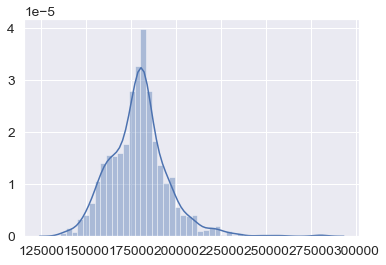

In [442]:
import seaborn as sns
sns.distplot(y_test_tr-predictions)

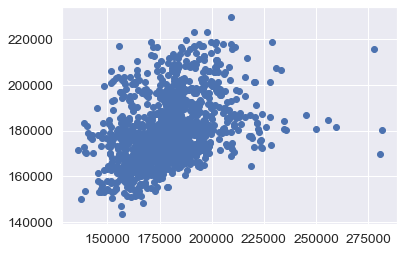

In [443]:
plt.scatter(y_test_tr,predictions_tr)

In [444]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
print("R2 Score: ",r2_score(y_test_tr, predictions_tr))
print("Root Mean Squared Error: ",mean_squared_error(y_test_tr, predictions_tr)**0.5)
print("mean_absolute_error: ",mean_absolute_error(y_test_tr, predictions_tr))

R2 Score:  -0.07572819737706982
Root Mean Squared Error:  17126.468572228106
mean_absolute_error:  12564.22806241733


In [445]:
y = pd.DataFrame(predictions_tr,columns=["SalePrice"])
y

,SalePrice
0,167498.657717
1,173875.306672
2,182782.244925
3,182897.761769
4,184591.374498
5,184146.731826
6,178710.734085
7,181224.998634
8,181781.335742
9,168049.278519


# Linear Regression

In [446]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [447]:
predictions = reg.predict(X_test)

In [448]:
import math
predictions_tr= sc.inverse_transform(predictions)
for i in range(len(predictions_tr)):
    predictions_tr[i] = math.exp(predictions_tr[i])
    

In [449]:
predictions_tr = predictions_tr.ravel()
print(predictions_tr)

[166936.29195904 174418.96761567 180627.38341492 ... 179138.92850381
 166376.99237644 191152.58568937]


In [450]:
y_test_tr= sc.inverse_transform(y_test)
for i in range(len(y_test_tr)):
    y_test_tr[i] = math.exp(y_test_tr[i])

In [451]:
y_test_tr = y_test_tr.ravel()
print(y_test_tr)

[169277.0525 187758.394  183583.6836 ... 219222.4234 184924.2797
 187741.8667]


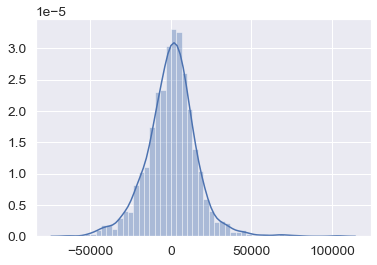

In [452]:
import seaborn as sns
sns.distplot(y_test_tr - predictions_tr)

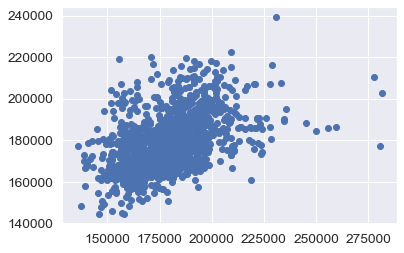

In [453]:
plt.scatter(y_test_tr,predictions_tr)

In [454]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
print("R2 Score: ",r2_score(y_test_tr, predictions_tr))
print("Root Mean Squared Error: ",mean_squared_error(y_test_tr, predictions_tr)**0.5)
print("mean_absolute_error: ",mean_absolute_error(y_test_tr, predictions_tr))

R2 Score:  0.09299605085894935
Root Mean Squared Error:  15726.103681237131
mean_absolute_error:  11495.105571570672


In [397]:
y = pd.DataFrame(predictions_tr,columns=["SalePrice"])
y

,SalePrice
0,168788.631556
1,175493.202171
2,183298.058459
3,184929.720972
4,180106.710737
5,184780.790736
6,182395.422899
7,182991.025052
8,184775.969324
9,167729.946850


# SVR

In [455]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [456]:
predictions_tr= sc.inverse_transform(predictions)
y_test_tr= sc.inverse_transform(y_test)

for i in range(len(y_test_tr)):
    y_test_tr[i] = math.exp(y_test_tr[i])
    
for i in range(len(predictions_tr)):
    predictions_tr[i] = math.exp(predictions_tr[i])

In [457]:
predictions_tr

array([169964.95317365, 176010.54387646, 185473.35434075, ...,
       177126.74976292, 169201.64298342, 189414.77347259])

In [458]:
y_test_tr = y_test_tr.ravel()
y_test_tr

array([169277.0525, 187758.394 , 183583.6836, ..., 219222.4234,
       184924.2797, 187741.8667])

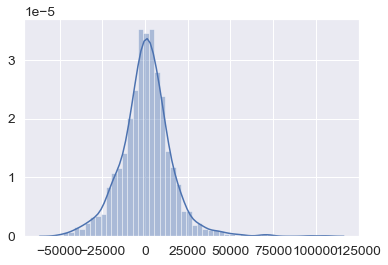

In [459]:
sns.distplot(y_test_tr - predictions_tr)

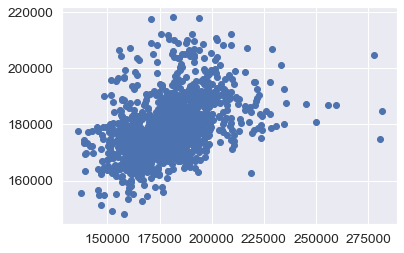

In [460]:
plt.scatter(y_test_tr,predictions_tr)

In [461]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
print("R2 Score: ",r2_score(y_test_tr, predictions_tr))
print("Root Mean Squared Error: ",mean_squared_error(y_test_tr, predictions_tr)**0.5)
print("mean_absolute_error: ",mean_absolute_error(y_test_tr, predictions_tr))

R2 Score:  0.1447184004461839
Root Mean Squared Error:  15271.12774135285
mean_absolute_error:  10943.673973989027


In [462]:
y = pd.DataFrame(predictions_tr,columns=["SalePrice"])
y

,SalePrice
0,169964.953174
1,176010.543876
2,185473.354341
3,183501.257815
4,177181.783609
5,185850.717993
6,176543.521157
7,183706.758610
8,182866.197669
9,173210.597970


# GradientBoostingRegressor

In [463]:
from sklearn.ensemble import GradientBoostingRegressor
regressorGB = GradientBoostingRegressor()
regressorGB.fit(X_train, y_train)

C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor()

In [464]:
predictions_tr= sc.inverse_transform(predictions)
y_test_tr= sc.inverse_transform(y_test)

for i in range(len(y_test_tr)):
    y_test_tr[i] = math.exp(y_test_tr[i])
    
for i in range(len(predictions_tr)):
    predictions_tr[i] = math.exp(predictions_tr[i])

In [465]:
y_test_tr = y_test_tr.ravel()
predictions_tr = predictions_tr.ravel()

In [466]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
print("R2 Score: ",r2_score(y_test_tr, predictions_tr))
print("Root Mean Squared Error: ",mean_squared_error(y_test_tr, predictions_tr)**0.5)
print("mean_absolute_error: ",mean_absolute_error(y_test_tr, predictions_tr))

R2 Score:  0.1447184004461839
Root Mean Squared Error:  15271.12774135285
mean_absolute_error:  10943.673973989027


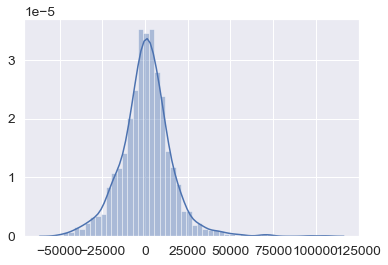

In [467]:
sns.distplot(y_test_tr - predictions_tr)

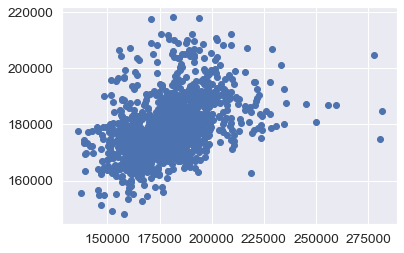

In [468]:
plt.scatter(y_test_tr,predictions_tr)

In [469]:
y = pd.DataFrame(predictions_tr,columns=["SalePrice"])
y

,SalePrice
0,169964.953174
1,176010.543876
2,185473.354341
3,183501.257815
4,177181.783609
5,185850.717993
6,176543.521157
7,183706.758610
8,182866.197669
9,173210.597970


### Even though model is not ideally fitted....But, SVR & GradientBoostingRegressor has good results compare to other algorithms.

# ANN

In [1226]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.optimizers import SGD

# Initialising the ANN
model = Sequential()
# Adding 1st Layer
model.add(Dense(12, input_dim=22, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(8, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.2))


# Final Layer
model.add(Dense(1,activation='linear'))
model.summary()
#opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])


Model: "sequential_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_406 (Dense)            (None, 12)                276       
_________________________________________________________________
dropout_264 (Dropout)        (None, 12)                0         
_________________________________________________________________
dense_407 (Dense)            (None, 8)                 104       
_________________________________________________________________
dropout_265 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_408 (Dense)            (None, 1)                 9         
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [1227]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 1168 samples, validate on 292 samples
Epoch 1/150
1168/1168 [==============================] - 0s 174us/step - loss: 5.0413 - mse: 5.0413 - mae: 1.5819 - val_loss: 1.6312 - val_mse: 1.6312 - val_mae: 0.9131
Epoch 2/150
1168/1168 [==============================] - 0s 32us/step - loss: 3.0620 - mse: 3.0620 - mae: 1.2597 - val_loss: 1.1149 - val_mse: 1.1149 - val_mae: 0.7602
Epoch 3/150
1168/1168 [==============================] - 0s 35us/step - loss: 2.7708 - mse: 2.7708 - mae: 1.2081 - val_loss: 0.9233 - val_mse: 0.9233 - val_mae: 0.6924
Epoch 4/150
1168/1168 [==============================] - 0s 36us/step - loss: 2.0749 - mse: 2.0749 - mae: 1.0457 - val_loss: 0.7335 - val_mse: 0.7335 - val_mae: 0.6209
Epoch 5/150
1168/1168 [==============================] - 0s 35us/step - loss: 1.5103 - mse: 1.5103 - mae: 0.9262 - val_loss: 0.6230 - val_mse: 0.6230 - val_mae: 0.5711
Epoch 6/150
1168/1168 [==============================] - 0s 38us/step - loss: 1.4996 - mse: 1.4996 - mae: 0.9042

1168/1168 [==============================] - 0s 35us/step - loss: 0.4141 - mse: 0.4141 - mae: 0.4705 - val_loss: 0.2706 - val_mse: 0.2706 - val_mae: 0.3707
Epoch 50/150
1168/1168 [==============================] - 0s 34us/step - loss: 0.3895 - mse: 0.3895 - mae: 0.4547 - val_loss: 0.2707 - val_mse: 0.2707 - val_mae: 0.3705
Epoch 51/150
1168/1168 [==============================] - 0s 32us/step - loss: 0.4028 - mse: 0.4028 - mae: 0.4688 - val_loss: 0.2685 - val_mse: 0.2685 - val_mae: 0.3686
Epoch 52/150
1168/1168 [==============================] - 0s 34us/step - loss: 0.4218 - mse: 0.4218 - mae: 0.4803 - val_loss: 0.2733 - val_mse: 0.2733 - val_mae: 0.3731
Epoch 53/150
1168/1168 [==============================] - 0s 33us/step - loss: 0.4122 - mse: 0.4122 - mae: 0.4703 - val_loss: 0.2757 - val_mse: 0.2757 - val_mae: 0.3748
Epoch 54/150
1168/1168 [==============================] - 0s 34us/step - loss: 0.4266 - mse: 0.4266 - mae: 0.4813 - val_loss: 0.2708 - val_mse: 0.2708 - val_mae: 0.3706

1168/1168 [==============================] - 0s 35us/step - loss: 0.3500 - mse: 0.3500 - mae: 0.4156 - val_loss: 0.2595 - val_mse: 0.2595 - val_mae: 0.3596
Epoch 98/150
1168/1168 [==============================] - 0s 36us/step - loss: 0.3169 - mse: 0.3169 - mae: 0.3959 - val_loss: 0.2469 - val_mse: 0.2469 - val_mae: 0.3492
Epoch 99/150
1168/1168 [==============================] - 0s 34us/step - loss: 0.3227 - mse: 0.3227 - mae: 0.4120 - val_loss: 0.2450 - val_mse: 0.2450 - val_mae: 0.3471
Epoch 100/150
1168/1168 [==============================] - 0s 34us/step - loss: 0.3089 - mse: 0.3089 - mae: 0.4100 - val_loss: 0.2492 - val_mse: 0.2492 - val_mae: 0.3511
Epoch 101/150
1168/1168 [==============================] - 0s 34us/step - loss: 0.3146 - mse: 0.3146 - mae: 0.4054 - val_loss: 0.2544 - val_mse: 0.2544 - val_mae: 0.3555
Epoch 102/150
1168/1168 [==============================] - 0s 34us/step - loss: 0.3401 - mse: 0.3401 - mae: 0.4158 - val_loss: 0.2606 - val_mse: 0.2606 - val_mae: 0.3

1168/1168 [==============================] - 0s 37us/step - loss: 0.2593 - mse: 0.2593 - mae: 0.3668 - val_loss: 0.2454 - val_mse: 0.2454 - val_mae: 0.3500
Epoch 146/150
1168/1168 [==============================] - 0s 32us/step - loss: 0.2821 - mse: 0.2821 - mae: 0.3784 - val_loss: 0.2558 - val_mse: 0.2558 - val_mae: 0.3591
Epoch 147/150
1168/1168 [==============================] - 0s 33us/step - loss: 0.2842 - mse: 0.2842 - mae: 0.3826 - val_loss: 0.2507 - val_mse: 0.2507 - val_mae: 0.3550
Epoch 148/150
1168/1168 [==============================] - 0s 34us/step - loss: 0.2784 - mse: 0.2784 - mae: 0.3781 - val_loss: 0.2493 - val_mse: 0.2493 - val_mae: 0.3529
Epoch 149/150
1168/1168 [==============================] - 0s 33us/step - loss: 0.2845 - mse: 0.2845 - mae: 0.3829 - val_loss: 0.2478 - val_mse: 0.2478 - val_mae: 0.3502
Epoch 150/150
1168/1168 [==============================] - 0s 34us/step - loss: 0.2886 - mse: 0.2886 - mae: 0.3866 - val_loss: 0.2561 - val_mse: 0.2561 - val_mae: 0

dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae'])


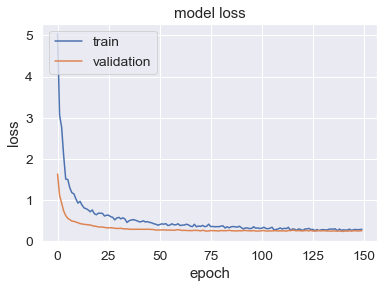

In [1228]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [1229]:
predictions = model.predict(X_test)

In [1230]:
import math
predictions_tr= sc.inverse_transform(predictions)
y_test_tr= sc.inverse_transform(y_test)

for i in range(len(y_test_tr)):
    y_test_tr[i] = math.exp(y_test_tr[i])
    
for i in range(len(predictions_tr)):
    predictions_tr[i] = math.exp(predictions_tr[i])

In [1231]:
y_test_tr = y_test_tr.ravel()
predictions_tr = predictions_tr.ravel()

In [1232]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
print("R2 Score: ",r2_score(y_test_tr, predictions_tr))
print("Root Mean Squared Error: ",mean_squared_error(y_test_tr, predictions_tr)**0.5)
print("mean_absolute_error: ",mean_absolute_error(y_test_tr, predictions_tr))

R2 Score:  0.24109936437492696
Root Mean Squared Error:  14384.971437516313
mean_absolute_error:  10232.076192820425


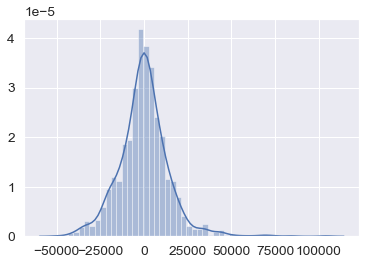

In [1233]:
sns.distplot(y_test_tr - predictions_tr)

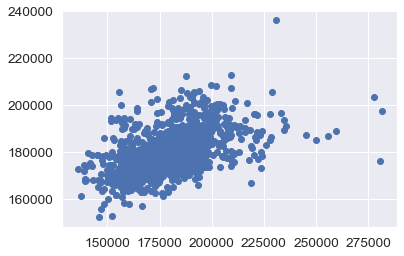

In [1234]:
plt.scatter(y_test_tr,predictions_tr)

In [1235]:
y = pd.DataFrame(predictions_tr,columns=["SalePrice"])
y

,SalePrice
0,172235.953125
1,176315.359375
2,181173.968750
3,183627.515625
4,177700.765625
5,181778.500000
6,180290.453125
7,180720.125000
8,181967.734375
9,174075.031250


In [689]:
#y.to_csv('New6.csv')

## Here, ANN gave better results among other Algorithms